In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

dataset = pd.read_csv('Exercise-CarData.csv')
print(dataset.describe())

        Unnamed: 0         Price          Age     MetColor    Automatic  \
count  1436.000000   1436.000000  1336.000000  1286.000000  1436.000000   
mean    717.500000  10730.824513    55.672156     0.674961     0.055710   
std     414.681806   3626.964585    18.589804     0.468572     0.229441   
min       0.000000   4350.000000     1.000000     0.000000     0.000000   
25%     358.750000   8450.000000    43.000000     0.000000     0.000000   
50%     717.500000   9900.000000    60.000000     1.000000     0.000000   
75%    1076.250000  11950.000000    70.000000     1.000000     0.000000   
max    1435.000000  32500.000000    80.000000     1.000000     1.000000   

                CC      Weight  
count  1436.000000  1436.00000  
mean   1566.827994  1072.45961  
std     187.182436    52.64112  
min    1300.000000  1000.00000  
25%    1400.000000  1040.00000  
50%    1600.000000  1070.00000  
75%    1600.000000  1085.00000  
max    2000.000000  1615.00000  


# Removing the Extra Column

In [2]:
# Removing extra column

dataset.drop("Unnamed: 0",axis=1,inplace=True)
dataset.head()


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


# Handeling Missing Values

In [3]:
# Handling miss values using


dataset['Doors'] = dataset['Doors'].replace({"three": "3", "four": "4", "five": "5"})
dataset['Doors'] = dataset['Doors'].astype(int)

# Replace placeholders with NaN
dataset['KM'] = dataset['KM'].replace("??", -1)
dataset['KM'] = dataset['KM'].astype(int)
dataset['HP'] = dataset['HP'].replace("????", -1)
dataset['HP'] = dataset['HP'].astype(int)
dataset['MetColor'] = dataset['MetColor'].fillna(-1).astype(int)




# Checking for Swewness

In [4]:
# Removing rows with all null values
dataset.dropna(axis=0,how='all',inplace=True)

# Check Skewness and then handel missing values accordingly
def check_skewness(data):
    results = {}
    for column in data.select_dtypes(include='number'):
        skew = data[column].skew()
        mean = data[column].mean()
        median = data[column].median()
        results[column] = {
            "Skewness": skew,
            "Mean": mean,
            "Median": median,
            "Skewed?": "Yes" if abs(skew) > 1 else "No"
        }
    return pd.DataFrame(results).T

skew_info = check_skewness(dataset)
print(skew_info)



           Skewness          Mean   Median Skewed?
Price      1.703885  10730.824513   9900.0     Yes
Age       -0.801266     55.672156     60.0      No
KM         0.955908  67930.162256  63061.5      No
HP        -0.336041    101.050139    110.0      No
MetColor  -1.009057           0.5      1.0     Yes
Automatic  3.878197       0.05571      0.0     Yes
CC         0.607241   1566.827994   1600.0      No
Doors     -0.076395      4.033426      4.0      No
Weight     3.108639    1072.45961   1070.0     Yes


# Imputing Missing Values based on Skewness

In [5]:
# Impeding Missing Values based on skewness


dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['MetColor'] = dataset['MetColor'].replace(-1,dataset['MetColor'].mode()[0])
dataset['CC'] = dataset['CC'].fillna(dataset['CC'].mean())
dataset['KM'] = dataset['KM'].replace(-1,dataset['KM'].mean())
dataset['HP'] = dataset['HP'].replace(-1,dataset['HP'].mean())

dataset.head()


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1,0,2000,3,1165
1,13750,23.0,72937.0,Diesel,90.0,1,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,1,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0,0,2000,3,1170


In [6]:

# Separating  features and output attribute

features = dataset.iloc[: , 2:11]
outputs = dataset.iloc[:,1:2]
print('Features:\n ' , features.head())
print('\n')
print('Outputs:\n' , outputs.head())






Features:
          KM FuelType    HP  MetColor  Automatic    CC  Doors  Weight
0  46986.0   Diesel  90.0         1          0  2000      3    1165
1  72937.0   Diesel  90.0         1          0  2000      3    1165
2  41711.0   Diesel  90.0         1          0  2000      3    1165
3  48000.0   Diesel  90.0         0          0  2000      3    1165
4  38500.0   Diesel  90.0         0          0  2000      3    1170


Outputs:
     Age
0  23.0
1  23.0
2  24.0
3  26.0
4  30.0


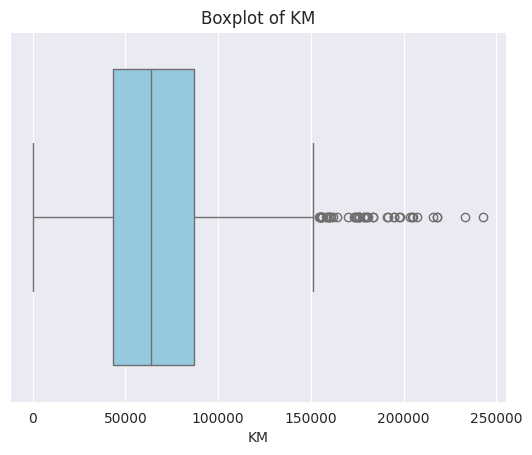

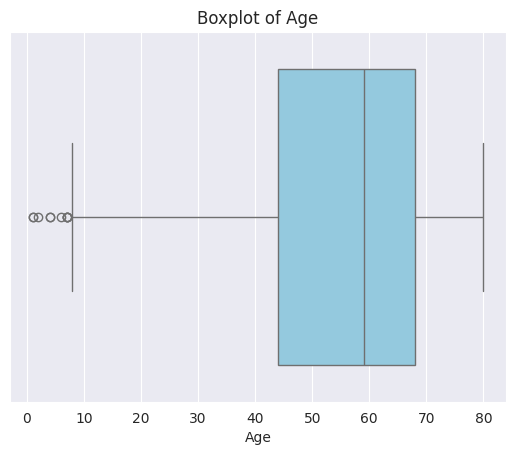

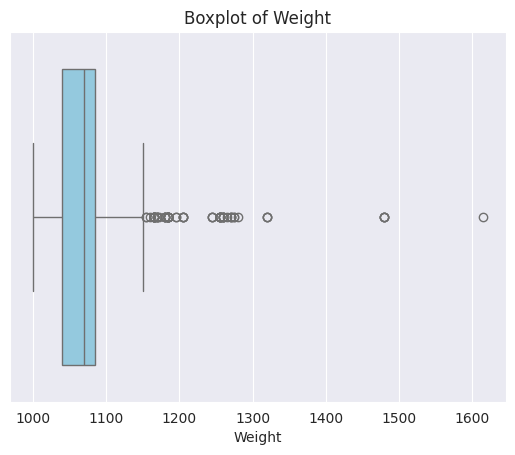

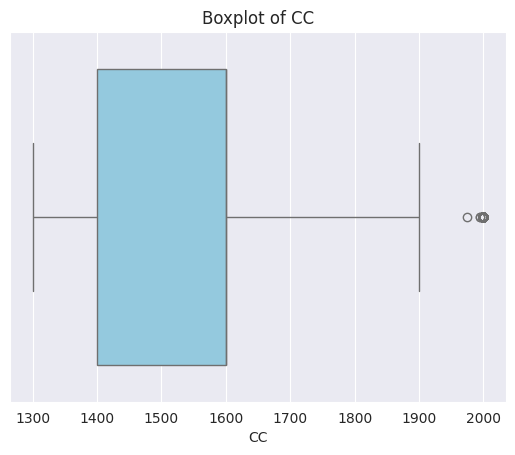

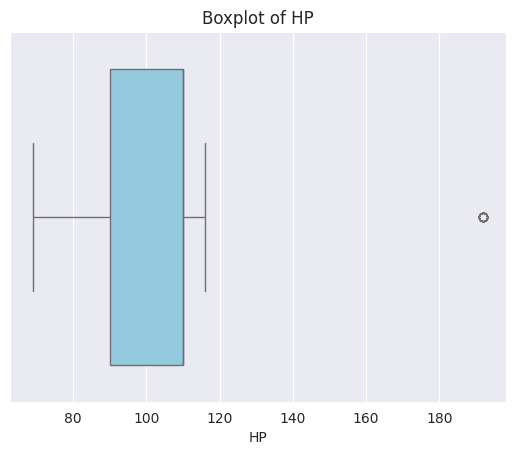

   Price   Age       KM FuelType    HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0   Diesel  90.0         1          0  2000      3   
1  13750  23.0  72937.0   Diesel  90.0         1          0  2000      3   
2  13950  24.0  41711.0   Diesel  90.0         1          0  2000      3   
3  14950  26.0  48000.0   Diesel  90.0         0          0  2000      3   
4  13750  30.0  38500.0   Diesel  90.0         0          0  2000      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  


In [7]:
import matplotlib.pyplot as plt

sns.boxplot(x=dataset['KM'], color="skyblue")
plt.title("Boxplot of KM")
plt.xlabel("KM")
plt.show()
print('\n')

sns.boxplot(x=dataset['Age'], color="skyblue")
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()
print('\n')

sns.boxplot(x=dataset['Weight'], color="skyblue")
plt.title("Boxplot of Weight")
plt.xlabel("Weight")
plt.show()
print('\n')

sns.boxplot(x=dataset['CC'], color="skyblue")
plt.title("Boxplot of CC")
plt.xlabel("CC")
plt.show()
print('\n')

sns.boxplot(x=dataset['HP'], color="skyblue")
plt.title("Boxplot of HP")
plt.xlabel("HP")
plt.show()


print(dataset.head())




# Handling Categorical Data

In [8]:
dummy = pd.get_dummies(dataset['FuelType'])
dataset = dataset.drop('FuelType', axis=1)
dataset = pd.concat([dummy, dataset], axis=1)
print(dataset.head())

     CNG  Diesel  Petrol  Price   Age       KM    HP  MetColor  Automatic  \
0  False    True   False  13500  23.0  46986.0  90.0         1          0   
1  False    True   False  13750  23.0  72937.0  90.0         1          0   
2  False    True   False  13950  24.0  41711.0  90.0         1          0   
3  False    True   False  14950  26.0  48000.0  90.0         0          0   
4  False    True   False  13750  30.0  38500.0  90.0         0          0   

     CC  Doors  Weight  
0  2000      3    1165  
1  2000      3    1165  
2  2000      3    1165  
3  2000      3    1165  
4  2000      3    1170  


In [10]:
# Scaling the data using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
dataset.loc[:,['Age','KM','HP','CC','Weight']] = scaler.fit_transform(dataset.loc[:,['Age','KM','HP','CC','Weight']])
# print(dataset.info())
print('\n' , dataset.head())



      CNG  Diesel  Petrol  Price       Age        KM   HP  MetColor  Automatic  \
0  False    True   False  13500 -1.500000 -0.391935 -1.0         1          0   
1  False    True   False  13750 -1.500000  0.205873 -1.0         1          0   
2  False    True   False  13950 -1.458333 -0.513450 -1.0         1          0   
3  False    True   False  14950 -1.375000 -0.368577 -1.0         0          0   
4  False    True   False  13750 -1.208333 -0.587419 -1.0         0          0   

    CC  Doors    Weight  
0  2.0      3  2.111111  
1  2.0      3  2.111111  
2  2.0      3  2.111111  
3  2.0      3  2.111111  
4  2.0      3  2.222222  
